In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
training_data = pd.read_csv('Polynomial_train.csv')
test_data = pd.read_csv('Polynomial_test.csv')

In [5]:
X = training_data.loc[:,'X':'Z'].values
X1 = X[:,0]
X2 = X[:,1]
X3 = X[:,2]
X = np.c_[np.ones((X.shape[0],1)) ,X1*X1,X2*X2,X3*X3,X1*X2,X2*X3,X3*X1]

Y = training_data.loc[:,'label'].values
Y = Y.reshape(50000, 1)

X_test = test_data.loc[:,'X':'Z'].values
x1 = X_test[:,0]
x2 = X_test[:,1]
x3 = X_test[:,2]
X_test = np.c_[np.ones((X_test.shape[0],1)) ,x1*x1,x2*x2,x3*x3,x1*x2,x2*x3,x3*x1]

Y_test = test_data.loc[:,'label'].values
Y_test = Y_test.reshape(10000, 1)

In [6]:
def ML2( X, Y, alpha,itr):
    m = X.shape[0]
    j=[]
    w=[]

    theta = np.zeros((X.shape[1], 1))

    for i in range(itr):
        Z = X@theta

        grad = (1/m)*(X.T@(Z-Y))

        cost = (1/(2*m))*((Z-Y)*(Z-Y)).sum()
        j.append(cost)
        w.append(i)

        theta = theta-(alpha/m)*grad
    plt.plot(w,j,)
    plt.xlabel('x - axis')
    plt.ylabel('y - axis')

    plt.show()
    return theta
            
def RMSEP(theta,X, Y):
    a =np.sqrt(((X@theta-Y)**2).sum()/10000)

    print(a)

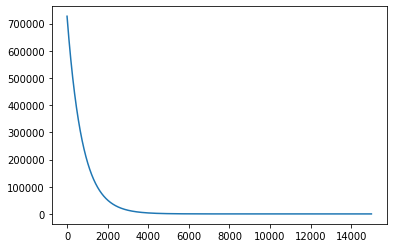

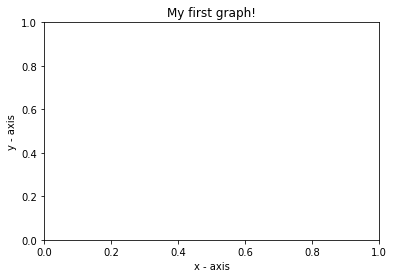

In [7]:
ML2 = ML2( X=X, Y=Y, alpha=0.03,itr=15000)

In [8]:
RMSEP(ML2,X=X_test, Y=Y_test)

1.5679247179387177
